In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, iirnotch, filtfilt, stft
import csv

from ipywidgets import DOMWidget, widget_serialization
from matplotlib import is_interactive, rcParams
from matplotlib._pylab_helpers import Gcf
from matplotlib.backend_bases import NavigationToolbar2, _Backend, cursors
from matplotlib.backends.backend_webagg_core import (
    FigureCanvasWebAggCore,
    FigureManagerWebAgg,
    NavigationToolbar2WebAgg,
    TimerTornado,
)
%matplotlib
import ipympl



Using matplotlib backend: module://matplotlib_inline.backend_inline


In [1]:
import numpy as np
from scipy.signal import windows
from scipy.constants import c
from scipy.signal import stft
from scipy.signal import square
from scipy.signal import butter, iirnotch, filtfilt, correlate
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')

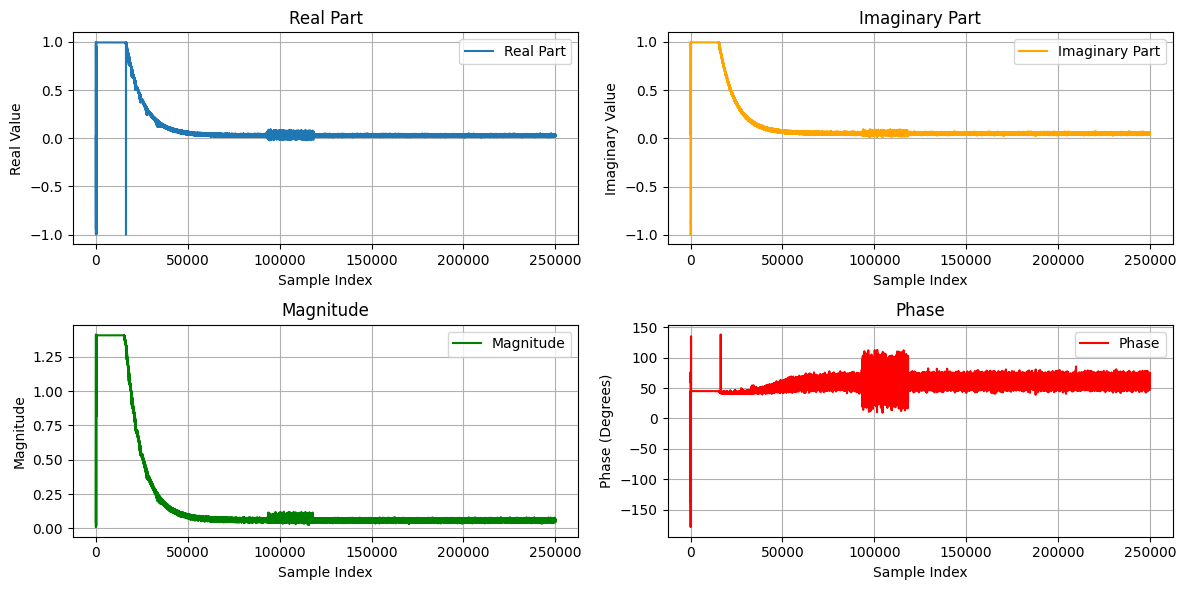

250000


In [27]:


# Define the path to your binary file
file_path = 'outputs/loopback_from_file_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]


# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]

fs = 25e6
fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_freq_axis = np.fft.fftfreq(len(fft_data),1/fs)

# Compute magnitude and phase
magnitudes = np.abs(complex_data)
phases = np.angle(complex_data, deg=True)  # Phase in degrees

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot real part
real = np.real(complex_data)
#real = moving_average_filter(real,10)
axs[0, 0].plot(real, label='Real Part')
axs[0, 0].set_title('Real Part')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Real Value')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot imaginary part
axs[0, 1].plot(np.imag(complex_data), label='Imaginary Part', color='orange')
axs[0, 1].set_title('Imaginary Part')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Imaginary Value')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot magnitude
axs[1, 0].plot(magnitudes, label='Magnitude', color='green')
axs[1, 0].set_title('Magnitude')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot phase
axs[1, 1].plot(phases, label='Phase', color='red')
axs[1, 1].set_title('Phase')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Phase (Degrees)')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

print(num_new_samples)

In [ ]:
file_path = 'rx_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
file_path = 'loopback_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


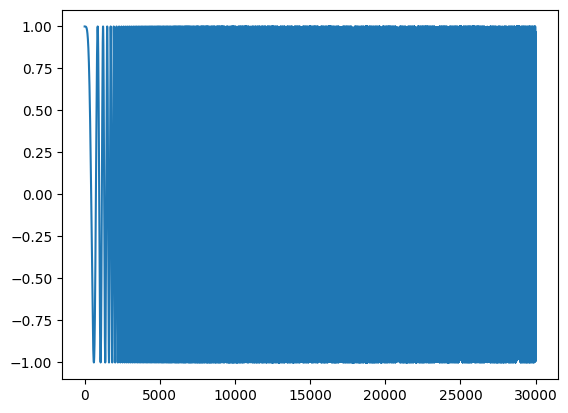

In [4]:
# write to csv for TX

# params
# relative to TX centre freq
amplitude = 1

sampleRate = 50e6
signalLengthTime = 1e-4
signalLength = signalLengthTime*sampleRate

signalLength = 30000

startFrequency = 0
endFrequency = 2e6


result = []


for i in range(int(signalLength)):
    t = i / sampleRate
    frequency = startFrequency + (endFrequency - startFrequency) * i / signalLength
    phase = 2.0 * np.pi * frequency * t
    sample = amplitude * np.exp(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part
    result.append(sample)

# appending zeros so transmitting is "turned off"
num_zeros = int(0e3)
for i in range(num_zeros):
    result.append(0)
result = np.array(result)

# Write to CSV file
with open('sweep.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in result:
        csvwriter.writerow([sample.real, sample.imag])




plt.plot(result)


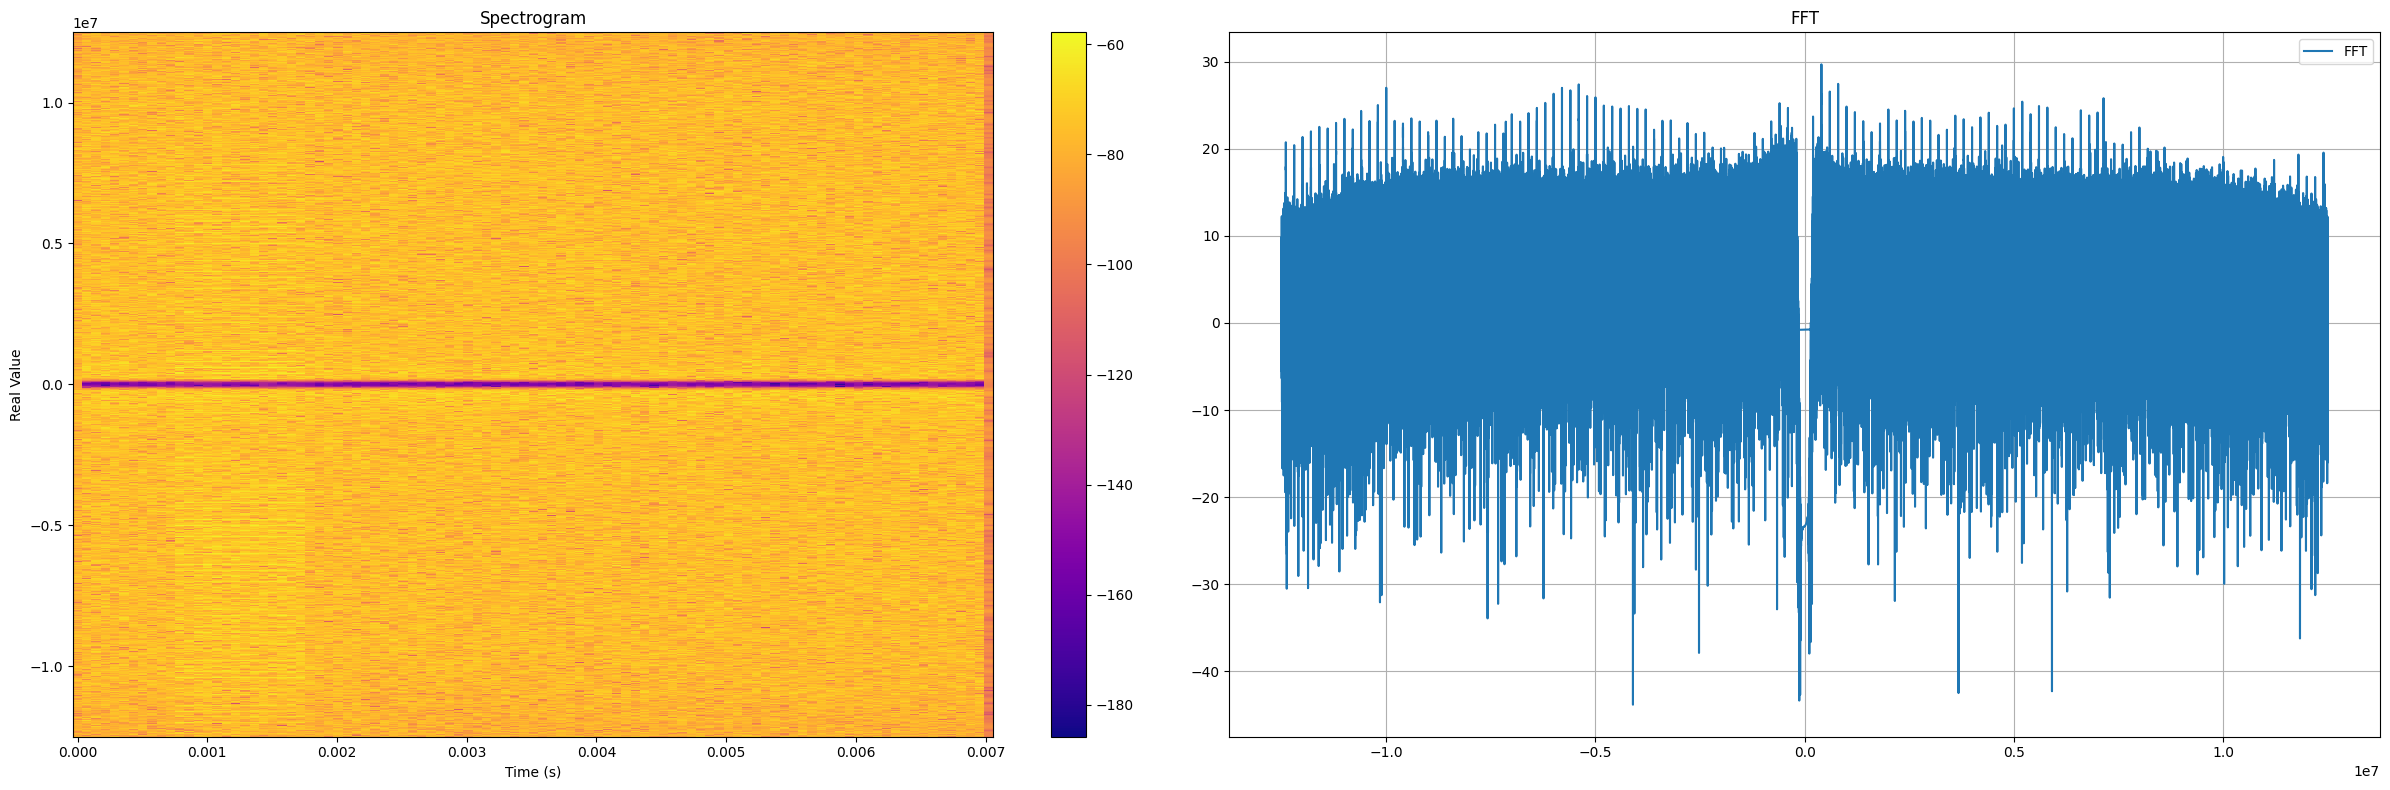

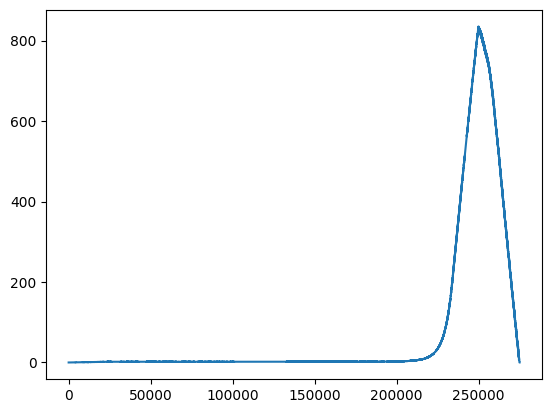

In [29]:
# waterfall

file_path = 'outputs/loopback_from_file_test.bin'
#file_path = 'outputs/loopback_test.bin'
fs = 25e6

# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]
Sr = np.abs(complex_data)**2
size = len(complex_data)
complex_data = complex_data[int(0.0015*fs):-1]


# Notch filter
# Parameters
notch_freq = 0  # Notch filter centered at 0 Hz (DC)
quality_factor = 30  # Q-factor for the notch filter
cutoff_freq = 0.2e6  # 
nyquist_rate = fs / 2
normalized_cutoff = cutoff_freq / nyquist_rate
b, a = butter(4, normalized_cutoff, btype='high', analog=False)
complex_data = filtfilt(b, a, complex_data)




# Compute the Short-Time Fourier Transform (STFT)
nperseg = 256*8  # Number of samples per segment
noverlap = nperseg // 8  # Number of overlapping samples
frequencies, times, Zxx = stft(complex_data, fs=fs, nperseg=nperseg, noverlap=noverlap)


# Shift the zero frequency component to the center
Zxx_shifted = np.fft.fftshift(Zxx, axes=0)
frequencies_shifted = np.fft.fftshift(frequencies)

# Compute the magnitude of the STFT
magnitude_spectrogram = np.abs(Zxx_shifted)
threshold_dB = 40
threshold = 10**(threshold_dB / 20)  # Convert dB to linear scale

magnitude_spectrogram_db = 20 * np.log10(magnitude_spectrogram)



# Plotting spectrogram
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

cax0 = axs[0].pcolormesh(times, frequencies_shifted, magnitude_spectrogram_db, shading='auto', cmap='plasma')
#axs[0].set_colorbar(label='Magnitude (dB)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Real Value')
axs[0].set_title('Spectrogram')

# plotting fft
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
# Filter frequencies below 40 dB 
#threshold_dB = 40
#threshold = 10**(threshold_dB / 20)  # Convert dB to linear scale
#magnitude = np.where(magnitude >= threshold, magnitude, 0.1)
magnitude_db = 20 * np.log10(magnitude)




axs[1].plot(fft_freq_axis, magnitude_db, label='FFT')
axs[1].set_title('FFT')
axs[1].legend()
axs[1].grid(True)

fig.colorbar(cax0, ax=axs[0])
plt.tight_layout()
plt.show()


# Read the CSV file into a DataFrame with default column names (0, 1)
df = pd.read_csv('pulse.csv', header=None)
I = df[0].values
Q = df[1].values
iq_signal = I + 1j * Q
St = np.abs(iq_signal) ** 2

corr = np.correlate(St,Sr,mode='full')
plt.plot(corr)


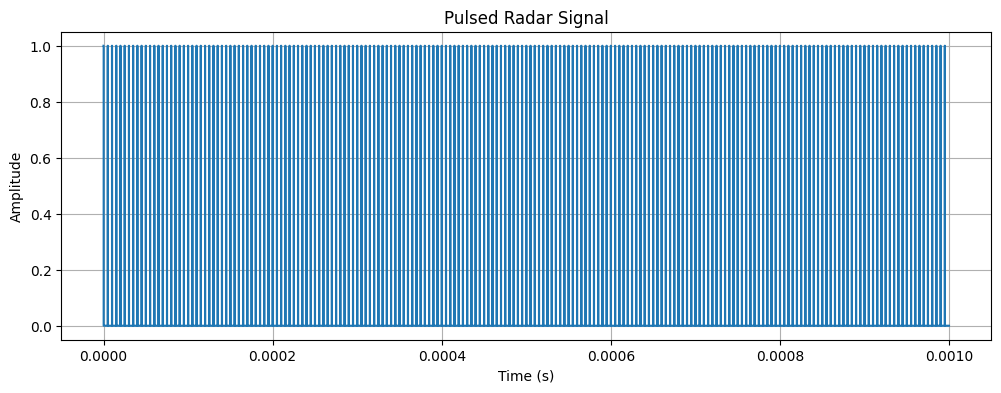

In [4]:
# write pulse train to csv


# Parameters
total_duration = 1e-3
pulse_duration = 1e-7  # Pulse duration in seconds
pulse_repetition_interval = 5e-6  # Pulse repetition interval in seconds
number_of_pulses = total_duration / pulse_repetition_interval # Number of pulses to generate




# Create time array
sampling_rate = 25e6  # Sampling rate in Hz
t = np.arange(0, total_duration, 1 / sampling_rate)

# Initialize IQ arrays
iq_real = np.zeros_like(t)
iq_imag = np.zeros_like(t)

# Generate pulse train
for i in range(int(number_of_pulses)):
    start_time = i * pulse_repetition_interval
    end_time = start_time + pulse_duration
    pulse_indices = (t >= start_time) & (t < end_time)
    iq_real[pulse_indices] = 1  # Set the real part to 1 during the pulse duration

# Combine real and imaginary parts
iq_data = iq_real + 1j * iq_imag



# Plot pulse train
plt.figure(figsize=(12, 4))
plt.plot(t, iq_data, drawstyle='steps-post')
plt.title('Pulsed Radar Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



# Write to CSV file
with open('pulse.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in iq_data:
        csvwriter.writerow([sample.real, sample.imag])